In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image, ImageFont, ImageDraw, ImageEnhance, ImageOps, ImageChops

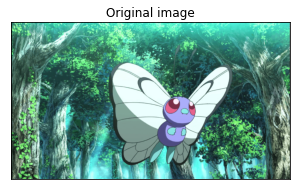

In [2]:
#img=Image.open("1.jpeg").convert("RGB")
img=Image.open("2.png").convert("RGB")
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(img),plt.title('Original image'),plt.xticks([]), plt.yticks([])
plt.show()

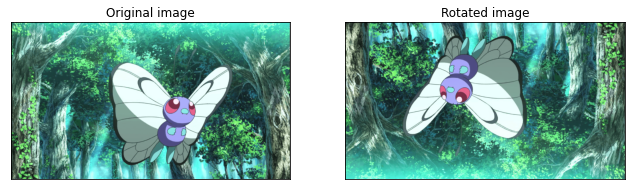

In [3]:
def rotate_image(image, rotation_angle):
    rotated_img=image.rotate(rotation_angle)
    return rotated_img

rotated_img=rotate_image(img,180)

plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(img),plt.title('Original image'),plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(rotated_img),plt.title('Rotated image'),plt.xticks([]), plt.yticks([])
plt.show()

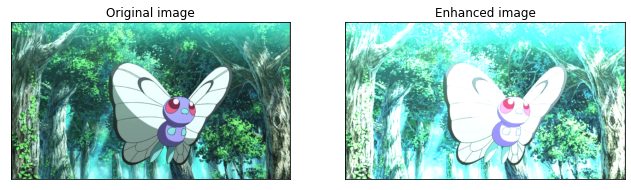

In [4]:
enhancer = ImageEnhance.Brightness(img)
enhanced_img = enhancer.enhance(2)

plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(img),plt.title('Original image'),plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(enhanced_img),plt.title('Enhanced image'),plt.xticks([]), plt.yticks([])
plt.show()

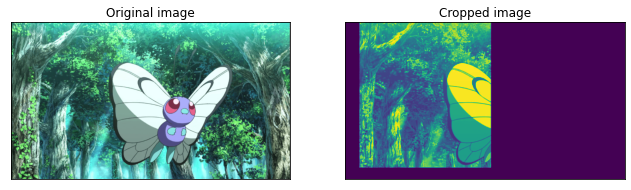

In [5]:
def crop(img):
    xy = [(100,0),(1000,0),(1000,1000),(100,1000)]
    mask = Image.new("L", img.size, 0)
    draw = ImageDraw.Draw(mask)
    draw.polygon(xy, fill=255, outline=None)
    black =  Image.new("L", img.size, 0)
    cropped_img = Image.composite(img, black, mask)
    return cropped_img

cropped_img=crop(img)

plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(img),plt.title('Original image'),plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cropped_img),plt.title('Cropped image'),plt.xticks([]), plt.yticks([])
plt.show()

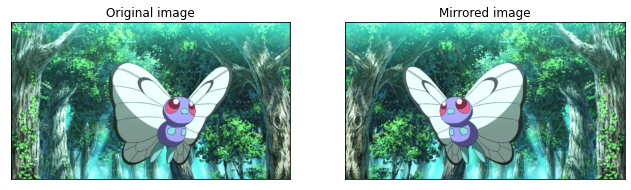

In [6]:
def mirroring(image):
    mirrored_img = image.transpose(Image.FLIP_LEFT_RIGHT) 
    #mirrored_img = image.transpose(Image.FLIP_TOP_BOTTOM)
    return mirrored_img

mirrored_img=mirroring(img)

plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(img),plt.title('Original image'),plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(mirrored_img),plt.title('Mirrored image'),plt.xticks([]), plt.yticks([])
plt.show()

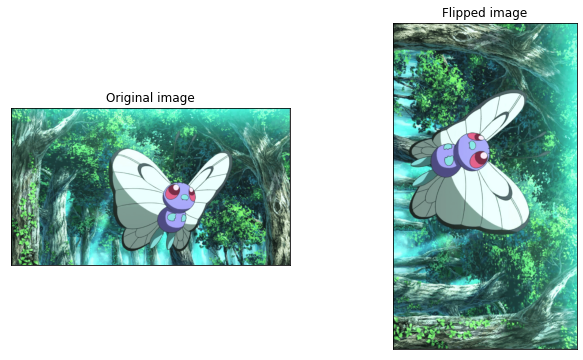

In [7]:
def flipping(image): 
    flipped = image.transpose(Image.TRANSVERSE) #or TRANSPOSE
    return flipped
flipped_img = flipping(img)

plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(img),plt.title('Original image'),plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(flipped_img),plt.title('Flipped image'),plt.xticks([]), plt.yticks([])
plt.show()

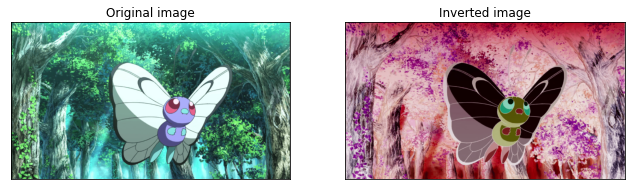

In [8]:
def inverting(image):
    image = image.convert("RGB")
    inverted_image=ImageChops.invert(image)
    return inverted_image

inverted_image = inverting(img)

plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(img),plt.title('Original image'),plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(inverted_image),plt.title('Inverted image'),plt.xticks([]), plt.yticks([])
plt.show()

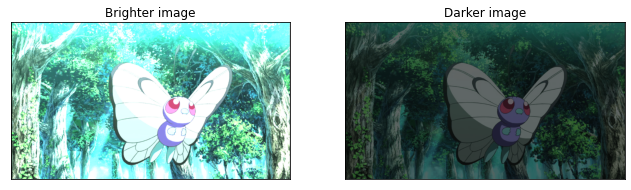

In [9]:
def brightness(img, factor):
    enhancer = ImageEnhance.Brightness(img)
    im_output = enhancer.enhance(factor)
    return im_output

bright_img = brightness(img,1.8)
darken_img = brightness(img,0.4)

plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(bright_img),plt.title('Brighter image'),plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(darken_img),plt.title('Darker image'),plt.xticks([]), plt.yticks([])
plt.show()

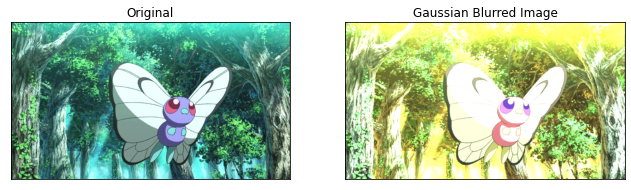

In [10]:
def gaussian_blur(img):
    open_cv_image = np.array(img) 
    img = open_cv_image[:, :, ::-1].copy()
    gaussianBlurKernel = np.array(([[1, 2, 1], [2, 4, 2], [1, 2, 1]]), np.float32)/9
    gaussianBlur = cv2.filter2D(src=img, kernel=gaussianBlurKernel, ddepth=-1)
    return gaussianBlur

gaussian_blurred_img = gaussian_blur(img)

plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(img),plt.title('Original'),plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(gaussian_blurred_img),plt.title('Gaussian Blurred Image'),plt.xticks([]), plt.yticks([])
plt.show()

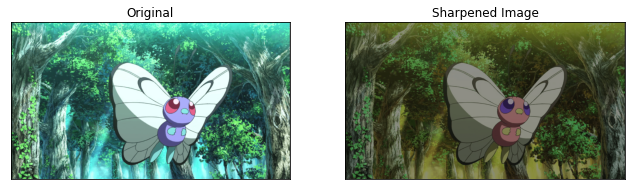

In [11]:
def sharpen(img):
    open_cv_image = np.array(img) 
    img = open_cv_image[:, :, ::-1].copy()
    sharpenKernel = np.array(([[0, -1, 0], [-1, 9, -1], [0, -1, 0]]), np.float32)/9
    sharpen = cv2.filter2D(src=img, kernel=sharpenKernel, ddepth=-1)
    return sharpen

sharpened_img = sharpen(img)

plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(img),plt.title('Original'),plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(sharpened_img),plt.title('Sharpened Image'),plt.xticks([]), plt.yticks([])
plt.show()

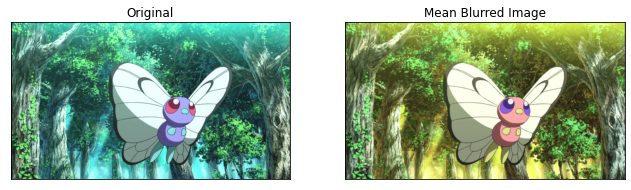

In [12]:
def mean_blur(img):
    open_cv_image = np.array(img) 
    img = open_cv_image[:, :, ::-1].copy()
    mean_blur_kernel = np.ones((3, 3), np.float32)/9
    mean_blur = cv2.filter2D(src=img, kernel=mean_blur_kernel, ddepth=-1)
    return mean_blur

mean_blurred_img = mean_blur(img)

plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(img),plt.title('Original'),plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(mean_blurred_img),plt.title('Mean Blurred Image'),plt.xticks([]), plt.yticks([])
plt.show()

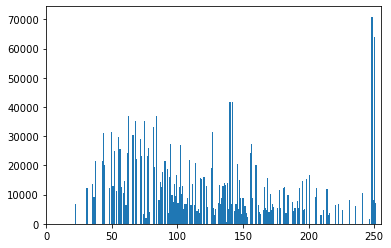

In [13]:
def histogram(img):
    open_cv_image = np.array(img) 
    img = open_cv_image[:, :, ::-1].copy()
    # calculate mean value from RGB channels and flatten to 1D array
    vals = img.mean(axis=2).flatten()
    # plot histogram with 255 bins
    b, bins, patches = plt.hist(vals, 255)
    plt.xlim([0,255])
    plt.show()
    
histogram(img)

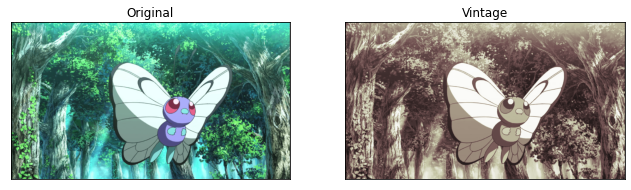

In [14]:
def vintage(img):
    open_cv_image = np.array(img) 
    img = open_cv_image[:, :, ::-1].copy()
    new_img = cv2.applyColorMap(img, cv2.COLORMAP_BONE)
    return new_img

vintage_img = vintage(img)

plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(img),plt.title('Original'),plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(vintage_img),plt.title('Vintage'),plt.xticks([]), plt.yticks([])
plt.show()

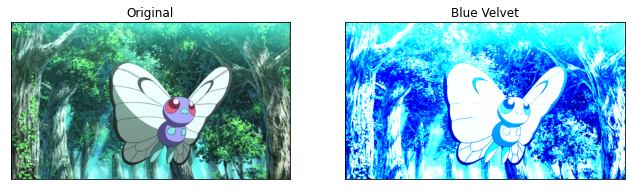

In [15]:
def blue_velvet(img):
    open_cv_image = np.array(img) 
    img = open_cv_image[:, :, ::-1].copy()
    kernel = np.array([[1, 1, 0],
                       [1, 0, -1],
                       [0, -1, 1]])
    new_img = cv2.filter2D(img, -1, kernel)
    new_img = cv2.applyColorMap(new_img, cv2.COLORMAP_HOT)
    return new_img

blue_velvet_img = blue_velvet(img)

plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(img),plt.title('Original'),plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(blue_velvet_img),plt.title('Blue Velvet'),plt.xticks([]), plt.yticks([])
plt.show()

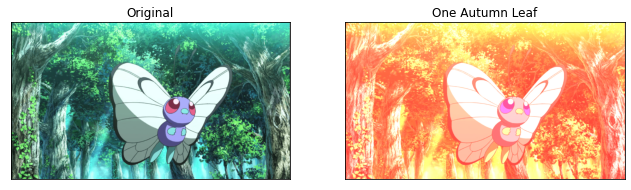

In [16]:
def one_autumn_leaf(img):
    open_cv_image = np.array(img) 
    img = open_cv_image[:, :, ::-1].copy()
    height = img.shape[0]
    width = img.shape[1]
    color_rgb = (255, 40, 40)
    overlay = np.full((height, width, 3), color_rgb, dtype='uint8')
    cv2.addWeighted(overlay, 1, img, 1.0, 0, img)
    new_img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)
    return new_img

one_autumn_leaf_img = one_autumn_leaf(img)

plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(img),plt.title('Original'),plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(one_autumn_leaf_img),plt.title('One Autumn Leaf'),plt.xticks([]), plt.yticks([])
plt.show()

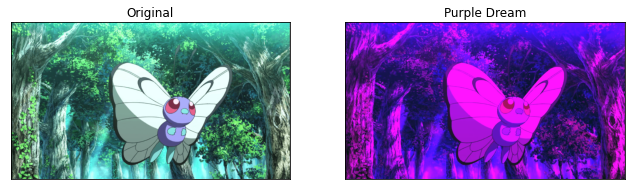

In [17]:
def purple_dream(img):
    open_cv_image = np.array(img) 
    img = open_cv_image[:, :, ::-1].copy()
    b, g, r = cv2.split(img)
    b = b * 1.35
    g = g * 0.0
    r = r * 1.25
    rbr_img = cv2.merge((r,g,b))
    new_img = cv2.convertScaleAbs(rbr_img, alpha=1.2, beta=-20)
    new_img = cv2.bilateralFilter(new_img,9,75,75)
    return new_img

purple_dream_img = purple_dream(img)

plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(img),plt.title('Original'),plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(purple_dream_img),plt.title('Purple Dream'),plt.xticks([]), plt.yticks([])
plt.show()

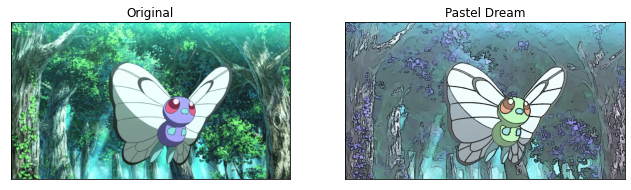

In [18]:
def pastel_dream(img):
    open_cv_image = np.array(img) 
    img = open_cv_image[:, :, ::-1].copy()
    element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (6,6))
    b, g, r = cv2.split(img)
    rbr_img = cv2.merge((r,b,g))
    morphology = cv2.morphologyEx(rbr_img, cv2.MORPH_OPEN, element)
    canvas = cv2.normalize(morphology,55,85,255,cv2.NORM_MINMAX)
    new_image = cv2.stylization(canvas, sigma_s=30, sigma_r=0.2)
    return new_image

pastel_dream_img = pastel_dream(img)

plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(img),plt.title('Original'),plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(pastel_dream_img),plt.title('Pastel Dream'),plt.xticks([]), plt.yticks([])
plt.show()

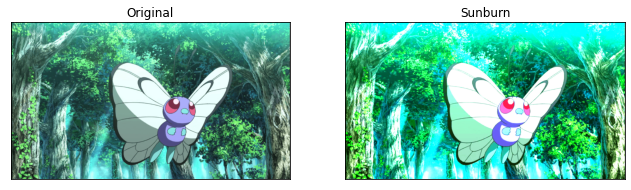

In [19]:
from pilgram import rise,util,css

def sunburn(img):
    cs = util.fill(img.size, [240, 240, 200, .2])
    new_img = css.blending.screen(img, cs)
    new_img = css.contrast(new_img, 1.9)
    new_img = css.brightness(new_img, 1.1)
    new_img = css.saturate(new_img, 1.8)
    return new_img

sunburn_img=sunburn(img)

plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(img),plt.title('Original'),plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(sunburn_img),plt.title('Sunburn'),plt.xticks([]), plt.yticks([])
plt.show()

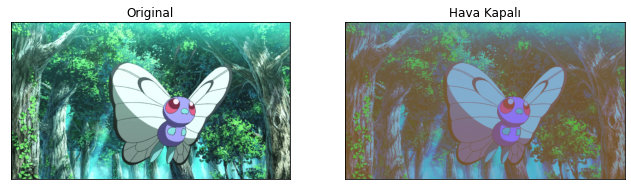

In [20]:
def hava_kapali(img):
    cs = util.fill(img.size, [255, 155, 55, .3])
    new_img = css.blending.difference(img, cs)
    new_img = css.brightness(new_img, 0.95)
    new_img = css.contrast(new_img, 0.6)
    new_img = css.saturate(new_img, 2.0)
    return new_img

hava_kapali_img=hava_kapali(img)

plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(img),plt.title('Original'),plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(hava_kapali_img),plt.title('Hava Kapalı'),plt.xticks([]), plt.yticks([])
plt.show()